# Individual nodes

Applications that were used: Cytoscape (v.3.8.2) and Jupyter Notebooks (v.2.2.6) through the Anaconda navigator (v.1.10.0).

In Cytoscape, the following app was installed: FileTransfer (v.1.1) for communication to Jupyter notebooks. 
To install apps in Cytoscape go to Apps -> App Manager -> Search

For those new to working with Jupyter Notebooks, go to the [MarkDown Tutorial](https://www.markdowntutorial.com/lesson/1/) to learn how to comment your code properly. 

Now let's move on to the code. 

## Deleting nodes without data

## Step 1 Importing Required Packages

In [1]:
import os
import sys
import requests
import pandas as pd
import py4cytoscape as p4c
from lxml import etree as ET

In [2]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler

In [3]:
log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("py4cytoscape.log")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

## Step 2: Loading an existing network

We are using a previously created network in .cys format. First we will define a new variable to the file path and then a new variable to the path+file name. You can also import files of different formats, such as the .sif format. Look into py4cytoscape documentation on how to import different file types. 

Now we will load this network in cytoscape

# Step 2b: Alternatively, load a pathway from wikipathways

In [8]:
WP_ID = 'WP5036'

In [9]:
cmd_list = ['wikipathways','import-as-pathway','id="', WP_ID,'"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

In [ ]:
expression_file = path + 'expDatafile.csv'
df=pd.read_csv(expression_file)
df.head()

In [ ]:
path = 'C:/Users/stefa/Documents/GitHub/2021-internship/Raats/'

In [ ]:
p4c.tables.get_table_column_names('node')

In [ ]:
p4c.load_table_data(df, data_key_column="Unnamed: 0")

## Step 3: Deleting columns without data  
We want to only select genes and only select gene nodes with no data.

In [16]:
only_genes_filter = p4c.create_column_filter('only_genes_filter','CTL.Type', 'gene',  "IS")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [21]:
exp_score_table = p4c.tables.get_table_columns('node', 'logFC')
exp_min = min(exp_score_table['logFC'])
exp_max = max(exp_score_table['logFC'])
print(exp_min)
print(exp_max)

nan
nan


In [22]:
no_expr_data = p4c.create_column_filter('no_expr_data','logFC', [-2, 4], "IS_NOT_BETWEEN")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [23]:
combined_filter = p4c.create_composite_filter('combined_filter', ['no_expr_data', 'only_genes_filter'])

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [25]:
p4c.delete_selected_nodes()


{'nodes': [35367,
  35348,
  35340,
  35352,
  35419,
  35327,
  35335,
  35445,
  35314,
  35320,
  35647,
  35394,
  35374,
  35441,
  35402,
  35660,
  35328,
  35378,
  35303,
  35341,
  35454,
  35343,
  35288,
  35355,
  35385,
  35295,
  35291,
  35304,
  35349,
  35446,
  35319,
  35342,
  35322,
  35362,
  35333,
  35358,
  35425,
  35379,
  35312,
  35389,
  35456,
  35691,
  35393,
  35326,
  35421,
  35353,
  35428,
  35383,
  35323,
  35316,
  35404,
  35637,
  35566,
  35612,
  35453,
  35668,
  35396,
  35305,
  35583,
  35390,
  35424,
  35690,
  35417,
  35364,
  35346,
  35357,
  35432,
  35331,
  35410,
  35440,
  35324,
  35350,
  35658,
  35339,
  35643,
  35365,
  35369,
  35298,
  35283,
  35597,
  35443,
  35330,
  35663,
  35444,
  35436,
  35290,
  35429,
  35641,
  35392,
  35656,
  35292,
  35388,
  35289,
  35598,
  35401,
  35373,
  35578,
  35375,
  35435,
  35317,
  35308,
  35299,
  35359,
  35285,
  35368,
  35391,
  35448,
  35412,
  35395,
  35366,
 

In [26]:
p4c.layout_network()

{}

### Now go into cytoscape and delete all selected nodes

In [ ]:
p4c.export_image(filename='delNetwork.png')
p4c.sandbox_get_from('delNetwork.png')
from IPython.display import Image
Image('delNetwork.png')

## Now you might want to select specific pathways and delete those. In my case, I will delete every pathway on the right. So the bradykinin system, bradykinin receptor b1 activation and increased prostaglandin e2 section and their associated pathways

In [18]:
namefilter = p4c.create_column_filter('namefilter','name', 'prostaglandin',  "CONTAINS")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


### Now go into cytoscape and delete all selected nodes

In [19]:
namefilter = p4c.create_column_filter('namefilter','name', 'kinin',  "CONTAINS")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


### Now go into cytoscape and delete all selected nodes

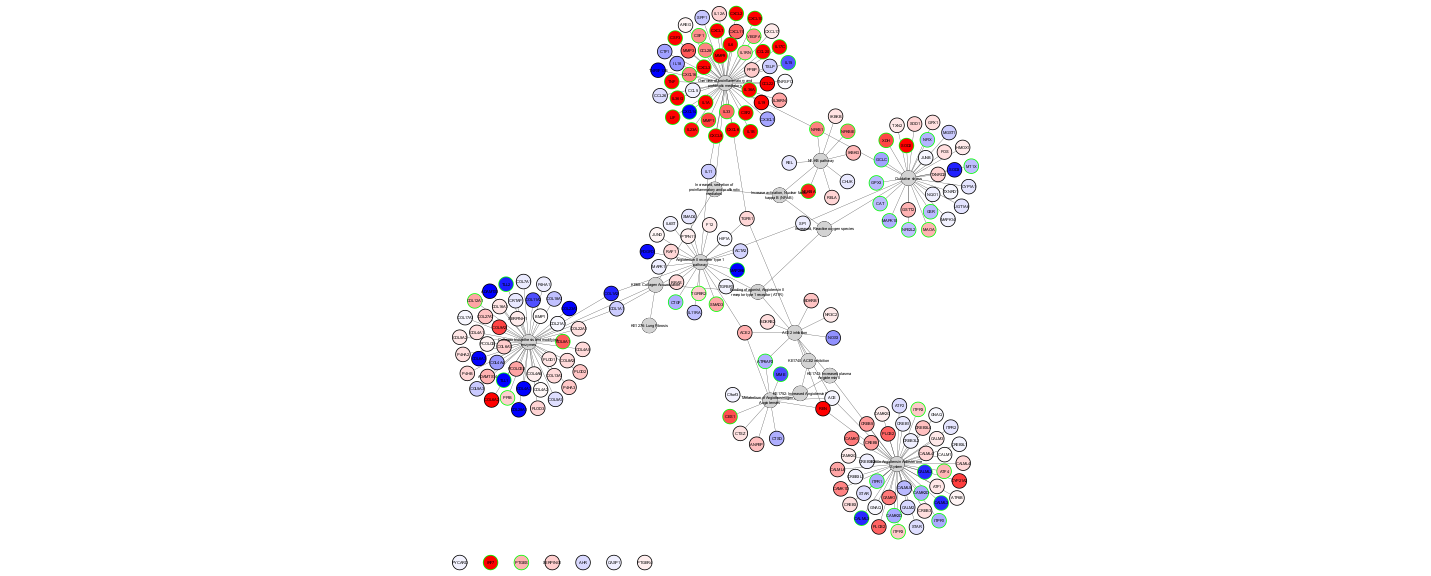

In [21]:
p4c.export_image(filename='stefanNetwork.png')
p4c.sandbox_get_from('stefanNetwork.png')
from IPython.display import Image
Image('stefanNetwork.png')